In [1]:
import numpy as np
from numpy.random import normal as normal
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
%pylab inline --no-import-all
print('matplotlib: '+matplotlib.__version__)

numpy: 1.16.1
Populating the interactive namespace from numpy and matplotlib
matplotlib: 3.0.2


In [2]:
all_particle_data = np.load('Result/all_particle_data.npy')
n_iterations = 6
n_particles = 8
#all_particle_data

array([[[1.50094269e+03, 5.38895288e+00, 2.19188136e+01, 1.04510784e+01],
        [3.33685667e+03, 1.60912015e+01, 1.46287158e+01, 8.23579389e+00],
        [4.59666957e+03, 9.46959352e+00, 1.78035809e+01, 1.28515277e+01],
        [7.61027511e+02, 1.98202444e+01, 7.87636796e+00, 1.21187910e+01],
        [1.49682789e+03, 1.29737106e+01, 2.13189815e+01, 9.12642281e+00],
        [4.48059893e+03, 1.04137255e+01, 1.68647655e+01, 8.64312990e+00],
        [1.16976183e+01, 1.80800378e+01, 3.75072358e+00, 1.27636948e+01],
        [8.28185959e+02, 1.99343665e+01, 1.85990968e+01, 1.20047826e+01]],

       [[1.50094269e+03, 5.38895288e+00, 2.19188136e+01, 1.04510784e+01],
        [3.33685667e+03, 1.60912015e+01, 1.46287158e+01, 8.23579389e+00],
        [4.59666957e+03, 9.46959352e+00, 1.78035809e+01, 1.28515277e+01],
        [5.42521718e+03, 7.23372091e+00, 1.99479855e+01, 1.30098081e+01],
        [1.49682789e+03, 1.29737106e+01, 2.13189815e+01, 9.12642281e+00],
        [2.28609008e+03, 1.22965476e

In [3]:
nfr = n_iterations # Number of frames
fps = 1 # Frame per sec
xs = []
ys = []
zs = []
ws = []
for particle in range(n_particles):
    xs.append(all_particle_data.T[0][particle])
    ys.append(all_particle_data.T[1][particle])
    zs.append(all_particle_data.T[2][particle])
    ws.append(all_particle_data.T[3][particle])

[array([10.45107843, 10.45107843,  9.03853826,  8.29198558,  8.58954136,
         8.20994255]),
 array([8.23579389, 8.23579389, 7.51059917, 8.14755598, 8.62159125,
        8.30256568]),
 array([12.85152768, 12.85152768, 10.40012492,  8.44088263,  8.82888813,
         8.18603941]),
 array([12.11879102, 13.00980814,  9.89525252,  8.71970715,  8.95251045,
        12.84846159]),
 array([ 9.12642281,  9.12642281, 10.3695678 ,  9.33808144,  9.4596451 ,
         8.08704159]),
 array([8.6431299 , 8.99858297, 9.74446996, 9.23908953, 8.81899767,
        7.99441567]),
 array([12.76369485, 11.32348236, 10.65349987,  9.5461621 ,  8.87832122,
        11.22090064]),
 array([12.00478262, 10.17470158,  9.00096033,  8.33655766,  8.0496455 ,
         8.11792093])]

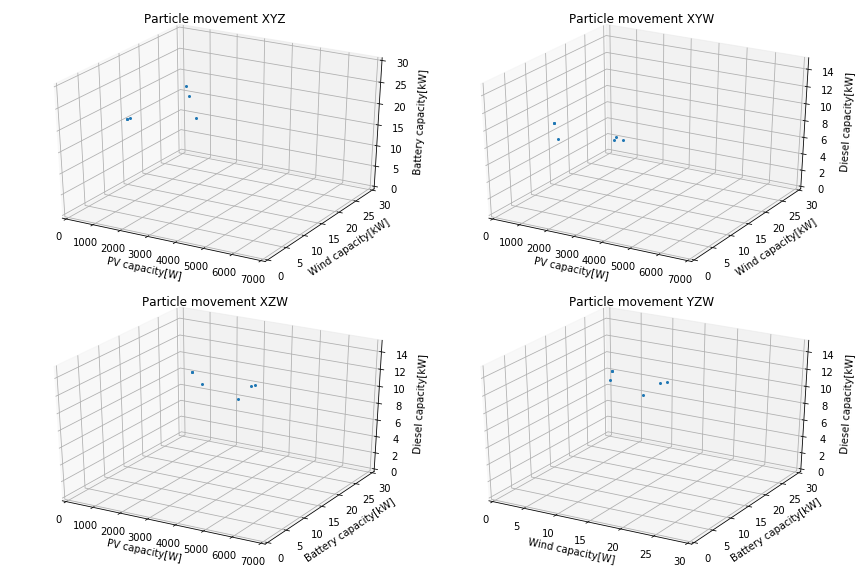

In [8]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(221, projection='3d')
sct1, = ax1.plot([], [], [], "o", markersize=2)
ax1.set_xlim(0,7000)
ax1.set_ylim(0,30)
ax1.set_zlim(0,30)
ax1.set_xlabel('PV capacity[W]')
ax1.set_ylabel('Wind capacity[kW]')
ax1.set_zlabel('Battery capacity[kW]')
ax1.set_title('Particle movement XYZ')

ax2 = fig.add_subplot(222, projection='3d')
sct2, = ax2.plot([], [], [], "o", markersize=2)
ax2.set_xlim(0,7000)
ax2.set_ylim(0,30)
ax2.set_zlim(0,15)
ax2.set_xlabel('PV capacity[W]')
ax2.set_ylabel('Wind capacity[kW]')
ax2.set_zlabel('Diesel capacity[kW]')
ax2.set_title('Particle movement XYW')

ax3 = fig.add_subplot(223, projection='3d')
sct3, = ax3.plot([], [], [], "o", markersize=2)
ax3.set_xlim(0,7000)
ax3.set_ylim(0,30)
ax3.set_zlim(0,15)
ax3.set_xlabel('PV capacity[W]')
ax3.set_ylabel('Battery capacity[kW]')
ax3.set_zlabel('Diesel capacity[kW]')
ax3.set_title('Particle movement XZW')

ax4 = fig.add_subplot(224, projection='3d')
sct4, = ax4.plot([], [], [], "o", markersize=2)
ax4.set_xlim(0,30)
ax4.set_ylim(0,30)
ax4.set_zlim(0,15)
ax4.set_xlabel('Wind capacity[W]')
ax4.set_ylabel('Battery capacity[kW]')
ax4.set_zlabel('Diesel capacity[kW]')
ax4.set_title('Particle movement YZW')

def update(ifrm, xa, ya, za, wa):
    sct1.set_data(xa[ifrm], ya[ifrm])
    sct1.set_3d_properties(za[ifrm])
    sct2.set_data(xa[ifrm], ya[ifrm])
    sct2.set_3d_properties(wa[ifrm])
    sct3.set_data(xa[ifrm], za[ifrm])
    sct3.set_3d_properties(wa[ifrm])
    sct4.set_data(ya[ifrm], za[ifrm])
    sct4.set_3d_properties(wa[ifrm])

plt.tight_layout()
ani = animation.FuncAnimation(fig, update, nfr, fargs=(xs,ys,zs,ws), interval=1000/fps)

In [5]:
fn = 'Result/plot_3d_scatter_funcanimation'
ani.save(fn+'.gif',fps=fps)

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


In [6]:
s = ani.to_jshtml()
with open( 'Result/plot_3d_scatter_funcanimation.html', 'w') as f:
    f.write(s)